# Customer satisfaction
- The goal of analysis is to make classifier of the reviews to understand what causes particular rate.  
The scale is from 1 to 5. A '5' is better than '4' etc. 
The target variable is ordinal, so the ordinal classification will be performed.
- Second goal is to predict satisfaction for new customers. 
# Next step
- Natural language processing to retrive more information from data.

In [198]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.pipeline import Pipeline

pd.options.display.max_rows = 10

sys.path.append("/Users/skronski/Documents/Projects/e_commerce/00_programs")
from directories import directories_path_setup
from directories import update_gitignore
from directories import reading_files

directories = directories_path_setup(
    "e_commerce", "/Users/skronski/Documents/Projects/"
)
files_dict = reading_files(directories)

olist_sellers_dataset = files_dict["olist_sellers_dataset"]
product_category_name_translation = files_dict["product_category_name_translation"]
olist_orders_dataset = files_dict["olist_orders_dataset"]
olist_order_items_dataset = files_dict["olist_order_items_dataset"]
olist_customers_dataset = files_dict["olist_customers_dataset"]
olist_order_payments_dataset = files_dict["olist_order_payments_dataset"]
olist_order_reviews_dataset = files_dict["olist_order_reviews_dataset"]
olist_products_dataset = files_dict["olist_products_dataset"]
olist_geolocation_dataset = files_dict["olist_geolocation_dataset"]

The /Users/skronski/Documents/Projects/e_commerce/00_programs exists already.
The /Users/skronski/Documents/Projects/e_commerce/01_input exists already.
The /Users/skronski/Documents/Projects/e_commerce/02_output exists already.
The /Users/skronski/Documents/Projects/e_commerce/03_temporary exists already.
['/Users/skronski/Documents/Projects/e_commerce/01_input/olist_sellers_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/product_category_name_translation.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_orders_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_order_items_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_customers_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_geolocation_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_order_payments_dataset.csv', '/Users/skronski/Documents/Projects/e_commerce/01_input/olist_order_reviews

# Joining Data keeping relevant columns
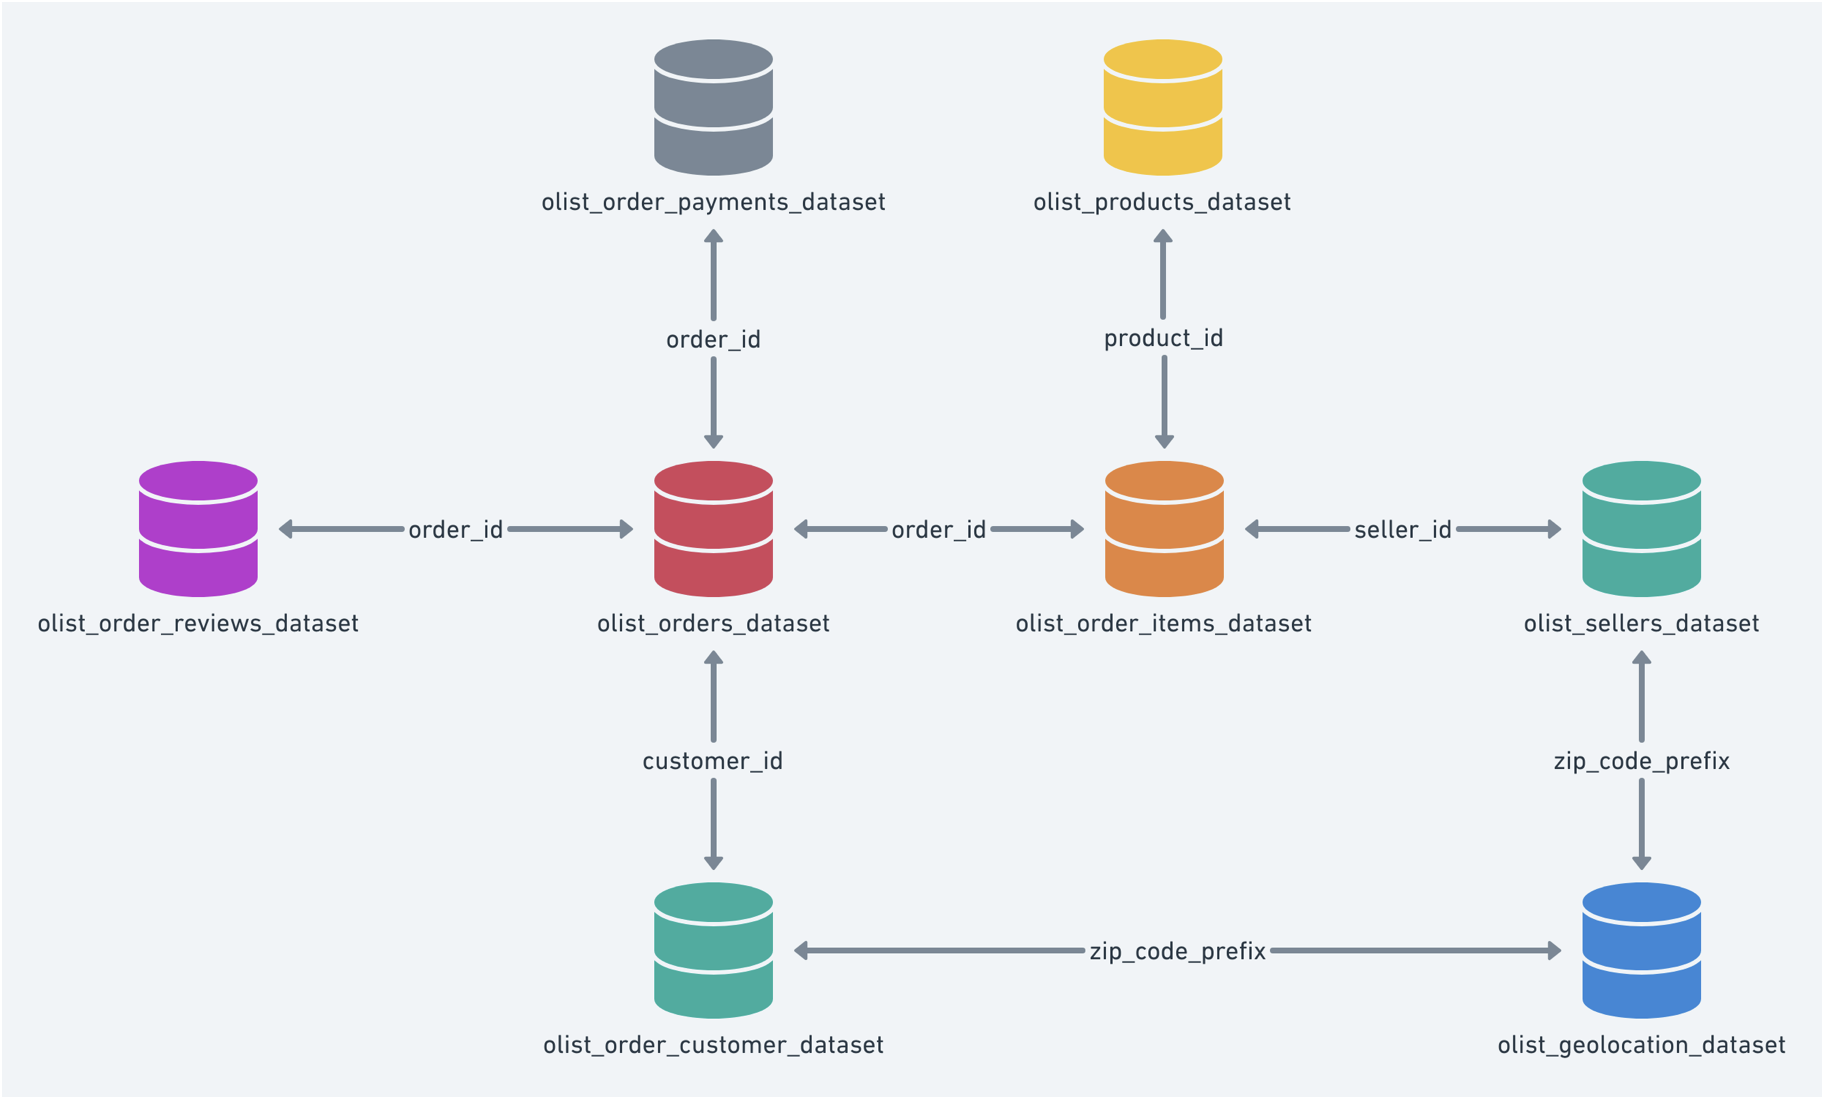  


In [206]:
reviews_orders = olist_order_reviews_dataset.merge(
    olist_orders_dataset, on="order_id", how="left"
)
reviews_orders_items = reviews_orders.merge(
    olist_order_items_dataset, on="order_id", how="left"
)
reviews_orders_items_products = reviews_orders_items.merge(
    olist_products_dataset, on="product_id", how="left"
)
reviews_orders_items_products

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,185.00,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,79.79,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,...,149.00,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,...,179.99,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113126,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,d8c466a3e7c4cda36cd4ae7d577f44f4,delivered,2018-06-27 17:31:29,...,226.77,61.20,moveis_decoracao,56.0,623.0,1.0,7250.0,100.0,25.0,25.0
113127,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,...,199.99,9.77,brinquedos,51.0,465.0,1.0,2363.0,23.0,27.0,19.0
113128,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,...,215.97,15.59,papelaria,45.0,283.0,3.0,4100.0,40.0,37.0,29.0
113129,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,...,50.95,15.46,esporte_lazer,58.0,998.0,5.0,600.0,16.0,10.0,11.0


In [207]:
df = reviews_orders_items_products[
    [
        "review_score",
        "review_answer_timestamp",
        "order_status",
        "order_purchase_timestamp",
        "order_approved_at",
        "order_delivered_carrier_date",
        "order_delivered_customer_date",
        "order_estimated_delivery_date",
        "shipping_limit_date",
        "price",
        "freight_value",
        "product_category_name",
        "product_name_lenght",
        "product_description_lenght",
        "product_photos_qty",
        "product_weight_g",
        "product_length_cm",
        "product_height_cm",
        "product_width_cm",
    ]
]
df.dtypes

review_score                  int64
review_answer_timestamp      object
order_status                 object
order_purchase_timestamp     object
order_approved_at            object
                             ...   
product_photos_qty          float64
product_weight_g            float64
product_length_cm           float64
product_height_cm           float64
product_width_cm            float64
Length: 19, dtype: object

In [208]:
from sklearn.model_selection import train_test_split

# split
X = df.drop("review_score", axis=1)
y = df["review_score"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Converting to datetime

In [209]:
datetime_columns = [
    "review_answer_timestamp",
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date",
    "order_estimated_delivery_date",
    "shipping_limit_date",
]
size_columns = ["product_length_cm", "product_height_cm", "product_width_cm"]

In [210]:
class date_time_converter(BaseEstimator, TransformerMixin):
    def __init__(self, datetime_columns):
        self.datetime_columns = datetime_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for column in self.datetime_columns:
            X_transformed[column] = pd.to_datetime(X_transformed[column])
        X_transformed["estimated_delivery_time"] = (
            X_transformed["order_estimated_delivery_date"]
            - X_transformed["order_purchase_timestamp"]
        ).dt.days
        X_transformed["actual_delivery_time"] = (
            X_transformed["order_delivered_customer_date"]
            - X_transformed["order_purchase_timestamp"]
        ).dt.days
        X_transformed["delivery_time_difference"] = (
            X_transformed["actual_delivery_time"]
            - X_transformed["estimated_delivery_time"]
        )
        X_transformed["late_flag"] = np.where(
            X_transformed["delivery_time_difference"] <= 0, 1, 0
        )
        for column in self.datetime_columns:
            X_transformed = X_transformed.drop(column, axis=1)

        return X_transformed

In [211]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [229]:
class size_transformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.size_columns = size_columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        X_transformed["obj"] = (
            X_transformed["product_length_cm"]
            * X_transformed["product_height_cm"]
            * X_transformed["product_width_cm"]
        )
        return X_transformed

In [234]:
class RemoveOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=3):
        self.threshold = threshold
        self.numeric_cols = numeric_cols

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col in numeric_cols:
            z_score = (X_transformed[col] - X_transformed[col].mean()) / X_transformed[
                col
            ].std()
            mean = X_transformed[col].mean()
            X_transformed[col] = np.where(
                abs(z_score) > self.threshold, mean, X_transformed[col]
            )
        return X_transformed


# Define numeric and categorical columns
numeric_cols = df.select_dtypes(include=["int", "float"]).columns
categorical_cols = df.select_dtypes(include=["object"]).columns

# Define transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[("outlier_remover", RemoveOutliers())])
obj_transformer = Pipeline(steps=[("obj", size_transformer())])
# Combine transformers for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("obj", obj_transformer, size_columns),
    ]
)

# Define final pipeline
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# Fit and transform data using pipeline
transformed_data = pipeline.fit_transform(df)

In [238]:
from sklearn.model_selection import KFold
from sklearn.ensemble import (
    RandomForestClassifier,
)  # Example classifier, replace with your choice
from sklearn.model_selection import cross_val_score, GridSearchCV

# Drop non-numeric columns
numeric_df = df.select_dtypes(include=["int", "float"])

# Define numeric columns
numeric_cols = numeric_df.columns
# Prepare features and target variable
X = numeric_cols.drop(columns="review_score")
y = numeric_cols["review_score"]


# Perform cross-validation
cv = KFold(
    n_splits=5, shuffle=True, random_state=42
)  # Define cross-validation strategy
scores = cross_val_score(
    pipeline, X, y, cv=cv, scoring="neg_mean_squared_error"
)  # Use neg_mean_squared_error for regression

print("Cross-validation scores:", scores)
print("Mean squared error:", np.mean(-scores))

TypeError: drop() got an unexpected keyword argument 'columns'

In [183]:
X_transformed = X_train.copy()
for i in size_columns:
    mean = X_transformed[i].mean()
    std = X_transformed[i].std()
    z_score = (X_transformed[i] - mean) / std
    X_transformed[i] = np.where(abs(z_score) > 1.2, mean, X_transformed[i])

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# for now we wont work with categorical data. Planning to add it on next releases
pipeline = Pipeline(
    [
        ("DateTimeConverter", date_time_converter(datetime_columns)),
        ("outliers", OutlierRemover(size_columns)),
    ]
)

In [158]:
X_train

,review_answer_timestamp,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
91095,2018-01-25 01:41:39,2018-01-04 15:14:41,2018-01-04 15:47:18,2018-01-05 22:55:11,2018-01-20 16:36:32,2018-02-08 00:00:00,2018-01-10 15:31:22,40.90,28.75,47.0,231.0,1.0,900.0,46.0,10.0,33.0
71974,2018-04-07 03:49:46,2018-03-10 12:41:26,2018-03-10 12:50:28,2018-03-12 20:32:12,2018-04-04 18:57:12,2018-04-03 00:00:00,2018-03-15 12:50:28,180.00,22.34,44.0,635.0,1.0,4050.0,25.0,22.0,21.0
110771,2018-07-02 01:08:11,2018-06-17 22:24:52,2018-06-19 04:16:57,2018-06-19 15:38:00,2018-06-30 15:44:56,2018-07-25 00:00:00,2018-07-04 04:16:57,25.99,10.71,49.0,888.0,1.0,200.0,33.0,6.0,12.0
56464,2017-11-26 23:46:55,2017-11-06 17:49:57,2017-11-08 03:31:02,2017-11-09 21:48:44,2017-11-24 20:09:49,2017-11-30 00:00:00,2017-11-14 03:30:27,89.90,19.87,54.0,1209.0,4.0,2200.0,30.0,30.0,30.0
3277,2018-07-30 16:48:32,2018-07-19 16:50:34,2018-07-19 17:03:58,2018-07-24 12:42:00,2018-07-27 13:21:34,2018-08-20 00:00:00,2018-07-31 17:03:58,44.00,13.65,60.0,213.0,1.0,450.0,16.0,30.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,2017-12-14 16:30:19,2017-12-06 14:06:15,2017-12-07 03:16:20,2017-12-07 17:32:48,2017-12-13 11:12:39,2017-12-29 00:00:00,2017-12-13 03:16:20,144.99,17.26,57.0,629.0,1.0,750.0,42.0,25.0,15.0
110268,2018-01-27 22:35:41,2018-01-09 20:22:23,2018-01-11 02:48:36,2018-01-13 02:10:17,2018-01-26 18:55:27,2018-02-07 00:00:00,2018-01-17 02:48:36,39.99,15.10,60.0,751.0,3.0,150.0,17.0,4.0,12.0
103694,2018-03-28 02:02:32,2018-03-14 00:17:05,2018-03-14 00:29:10,2018-03-15 19:19:31,2018-03-26 17:52:44,2018-04-12 00:00:00,2018-03-21 00:29:10,35.00,16.32,41.0,789.0,1.0,750.0,20.0,35.0,20.0
860,2018-08-15 21:26:52,2018-08-05 20:56:20,2018-08-05 21:10:18,2018-08-06 13:59:00,2018-08-14 17:12:03,2018-08-14 00:00:00,2018-08-07 21:10:18,26.40,19.38,32.0,501.0,1.0,550.0,35.0,2.0,50.0


In [196]:
# Train the pipeline
z = pipeline.fit(X_train)
z

Pipeline(steps=[('DateTimeConverter',
                 date_time_converter(datetime_columns=['review_answer_timestamp',
                                                       'order_purchase_timestamp',
                                                       'order_approved_at',
                                                       'order_delivered_carrier_date',
                                                       'order_delivered_customer_date',
                                                       'order_estimated_delivery_date',
                                                       'shipping_limit_date'])),
                ('outliers',
                 OutlierRemover(size_columns=['product_length_cm',
                                              'product_height_cm',
                                              'product_width_cm']))])

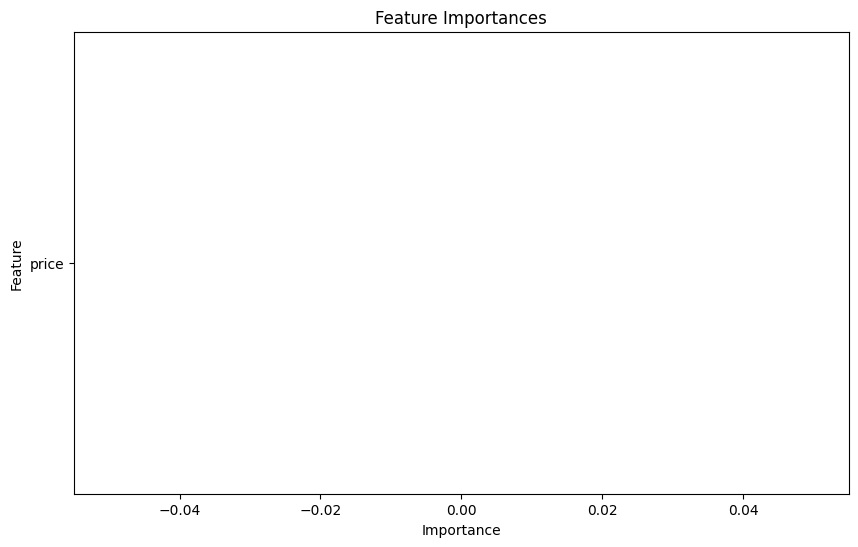

In [141]:
# Extract feature names after transformation
transformed_feature_names = (
    pipeline.named_steps["DateTimeConverter"].transform(X_train).columns
)
feature_importances = pipeline.named_steps["classifier"].feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame(
    {"Feature": transformed_feature_names, "Importance": feature_importances}
)

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()